In [1]:
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfTransformer
import json

with open("data/NER-TRAINING.jsonlines", 'r') as f:
    training_data = [json.loads(l) for l in list(f)] #opening file

#print(training_data)
training_data = pd.DataFrame(training_data).dropna() #putting in a DataFrame

with open("data/NER-TESTING.jsonlines", 'r') as f:
    testing_data = [json.loads(l) for l in list(f)] #opening file

#print(testing_data)
testing_data = pd.DataFrame(testing_data).dropna() #putting in a DataFrame

with open("data/NER-VALIDATION.jsonlines", 'r') as f:
    validation_data = [json.loads(l) for l in list(f)] #opening file
print(validation_data)
#print(validation_data)

validation_data = pd.DataFrame(validation_data).dropna() #putting in a DataFrame

print(training_data.head())

#X_training = training_data.tokens
#y_training = training_data.ner_tags
#print(X_training.shape, y_training.shape)


[{'unique_id': 6422, 'tokens': ['Just', '1', 'year', 'later', ',', 'after', 'beginning', 'their', 'enterprise', 'on', '3', 'servers', 'they', 'had', 'filled', '2', 'server', 'racks', 'with', 'happy', 'clients', 'receiving', 'quality', 'U.S', 'support', '.'], 'ner_tags': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}, {'unique_id': 4180, 'tokens': ['In', 'August', '2014', ',', 'some', 'of', 'our', 'users', 'observed', 'targeted', 'attacks', 'with', 'a', 'variation', 'of', 'CVE-2012-0158', 'and', 'an', 'unusual', 'set', 'of', 'malware', '.'], 'ner_tags': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}, {'unique_id': 282, 'tokens': ['This', 'unit', "'s", 'suspected', 'involvement', 'in', "''", 'space', 'surveillance', "''", 'and', "''", 'intercept', 'of', 'satellite', 'communications', "''", 'fits', 'with', 'their', 'observed', 'targetin

In [2]:
import pandas as pd
import spacy


nlp = spacy.load("en_core_web_sm") # load the english model for spacy


def word_features(doc, n=2):
    "This functions extracts caracteristics of the words"
    features = []
    for i, token in enumerate(doc):
        word_info = []
        # Extract word characteristics
        word = token.text  # The actual word text
        shape = len(word)  # Length of the word
        uppercase = token.is_title  # Whether the word starts with an uppercase letter
        number = token.like_num  # Whether the word represents a number
        position = token.i  # Position of the word in the sentence
        pos_tag = token.pos_  # Part-of-speech tag (e.g., noun, verb, etc.)
        dep = token.dep_  # Syntactic dependency label
        stop = token.is_stop  # Whether the word is a stop word
        tag = token.tag_  # Detailed part-of-speech tag
        word_info.extend([word, pos_tag, dep, tag, shape, uppercase, number, position, stop])
        features.append(word_info) # Append the word's features to the main list
    
    return features

def ApplyScapy(dataset):
    """
    Apply SpaCy to extract features for each sentence in a dataset.
    """
    all_features = []
    for sentence in dataset:
        sentence_text = " ".join(sentence).replace("-","").replace("'","") # Reconstruct the sentence text and clean it (remove hyphens and apostrophes)
        doc = nlp(sentence_text) # Convert the sentence to a SpaCy document
        features = word_features(doc) # Extract word-level features
        all_features.append(features) # Add the features of the sentence to the list
    
    # Create a new dataset with the results
    rows = []
    for sentence_idx, sentence_features in enumerate(all_features):
        full_sentence = " ".join([word_info[0] for word_info in sentence_features])# Reconstruct the full sentence from its word features
        rows.append({                       # Create a dictionary for the sentence and its details
            "Full Sentence": full_sentence,
            "Details": sentence_features
        })

    return pd.DataFrame(rows)


In [3]:
def Size_Check_Diff(dataset, column, dataset1, column1):
    """This function computes the size difference between 2 columns from different datasets"""
    # In our case, we use it to add the 'Details' column
    dataset1[column] = dataset[column]  # This adds the column from df to training_data

    i = 0
    fault = 0
    indexes = []

    for words in dataset[column]:
        # Check for every different size from the original dataframe
        if len(dataset[column][i]) != len(dataset1[column1][i]):
            fault += 1 
            indexes.append(i) #append every index that have a different size from the origignal tokens datas
        i += 1
    
    print("number of differences:", fault)
    print("Indexes with different sizes:", indexes)

    # Remove rows with a different size
    dataset = dataset.drop(indexes).reset_index(drop=True) #deleting the lines that can cause problem
    dataset1 = dataset1.drop(indexes).reset_index(drop=True)
    
    return dataset1

df = ApplyScapy(training_data.tokens)
print(df.head())

# df is the DataFrame with 'Details' and training_data is the original DataFrame with 'tokens'
training_data = Size_Check_Diff(df, 'Details', training_data, 'tokens') #after this we have the dataset with 1 more column for the words characteristics

# Display the results
#print("Shape of training_data after correction:", training_data.shape)
#print(df.head())
print(training_data.head())


                                       Full Sentence  \
0  Later in May of 2010 within a Pakistani Senate...   
1  In 2008 , Tom Donahue , a senior Central Intel...   
2  On the spectrum of state responsibility , thes...   
3  If we observe the network communications durin...   
4  The regimes CSTIA relies on Russia as one of s...   

                                             Details  
0  [[Later, ADV, advmod, RB, 5, True, False, 0, F...  
1  [[In, ADP, prep, IN, 2, True, False, 0, True],...  
2  [[On, ADP, prep, IN, 2, True, False, 0, True],...  
3  [[If, SCONJ, mark, IN, 2, True, False, 0, True...  
4  [[The, DET, det, DT, 3, True, False, 0, True],...  
number of differences: 217
Indexes with different sizes: [65, 76, 86, 104, 143, 144, 157, 202, 205, 225, 273, 309, 313, 327, 376, 407, 411, 415, 437, 453, 461, 527, 550, 567, 570, 589, 625, 626, 645, 715, 768, 796, 854, 856, 871, 912, 924, 936, 968, 969, 1023, 1027, 1072, 1085, 1098, 1118, 1131, 1139, 1164, 1178, 1190, 1196, 1212, 

In [4]:
df = ApplyScapy(validation_data.tokens) #Adding word characteristics for validation data
validation_data = Size_Check_Diff(df, 'Details', validation_data, 'tokens') 

# Display the results
print("Shape of df after correction:", df.shape)
print("Shape of validation_data after correction:", validation_data.shape)
print(validation_data.head())


def word_number_sentence(data, column):
    "This function helps to realign the tags at the end for the creation of the file"
    List = []
    for i in data[column]:
        List.append(len(i)) #appending the size of each sentences for the dataset
    return List


number of differences: 32
Indexes with different sizes: [2, 32, 55, 56, 69, 101, 135, 219, 232, 275, 305, 500, 532, 533, 538, 543, 578, 603, 679, 684, 694, 714, 725, 759, 776, 784, 848, 887, 917, 952, 972, 1036]
Shape of df after correction: (1044, 2)
Shape of validation_data after correction: (1012, 4)
   unique_id                                             tokens  \
0       6422  [Just, 1, year, later, ,, after, beginning, th...   
1       4180  [In, August, 2014, ,, some, of, our, users, ob...   
2       6333  [Interestingly, ,, the, samples, compiled, fol...   
3        571  [Thank, you, for, your, efforts, to, deliver, ...   
4       3605    [Red, Sky, also, targeted, M, in, Figure, 2, .]   

                                            ner_tags  \
0  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4           

In [5]:
df = ApplyScapy(testing_data.tokens) #Adding word characteristics for the testing data
testing_data = Size_Check_Diff(df, 'Details', testing_data, 'tokens') 

# Display the results
print("Shape of df after correction:", df.shape)
print("Shape of testing_data after correction:", testing_data.shape)
print(testing_data.head())

number of differences: 44
Indexes with different sizes: [23, 27, 64, 88, 110, 129, 138, 140, 145, 150, 163, 206, 245, 301, 303, 304, 317, 339, 358, 366, 376, 421, 436, 473, 492, 503, 613, 641, 647, 680, 755, 772, 791, 838, 877, 881, 883, 904, 929, 943, 965, 969, 971, 1045]
Shape of df after correction: (1046, 2)
Shape of testing_data after correction: (1002, 3)
   unique_id                                             tokens  \
0       1357  [Stage, 3, exports, hundreds, of, methods, ,, ...   
1       3016  [These, campaigns, leverage, the, phenomenon, ...   
2       6936  [Interestingly, ,, most, of, the, affected, vi...   
3       4538  [The, framework, is, notable, for, a, number, ...   
4       4327  ['', APT28, 's, lures, and, domain, registrati...   

                                             Details  
0  [[Stage, NOUN, nsubj, NN, 5, True, False, 0, F...  
1  [[These, DET, det, DT, 5, True, False, 0, True...  
2  [[Interestingly, ADV, advmod, RB, 13, True, Fa...  
3  [[The, DET

In [6]:
print(testing_data["tokens"].shape)
listr = word_number_sentence(testing_data, "tokens") #taking the list for the size of every original sentences
print(listr)


(1002,)
[14, 29, 37, 43, 19, 27, 25, 20, 11, 23, 28, 14, 30, 14, 9, 14, 17, 12, 43, 25, 34, 16, 18, 13, 31, 27, 29, 14, 24, 23, 32, 15, 12, 42, 24, 24, 20, 16, 24, 38, 25, 18, 18, 14, 14, 35, 1, 22, 20, 28, 27, 35, 23, 23, 47, 19, 21, 10, 14, 18, 34, 32, 43, 14, 15, 13, 30, 32, 23, 20, 16, 3, 25, 8, 22, 24, 24, 37, 35, 29, 21, 19, 30, 33, 23, 24, 32, 18, 17, 22, 13, 16, 21, 19, 27, 14, 23, 13, 23, 40, 24, 16, 22, 28, 28, 15, 15, 31, 29, 57, 26, 30, 14, 13, 28, 24, 31, 31, 36, 27, 20, 24, 39, 9, 48, 34, 21, 18, 10, 25, 33, 9, 19, 30, 38, 15, 29, 35, 24, 16, 32, 20, 20, 19, 20, 8, 24, 17, 40, 14, 7, 26, 19, 21, 45, 122, 11, 38, 36, 13, 36, 12, 21, 25, 28, 18, 34, 37, 20, 31, 7, 12, 23, 45, 32, 48, 10, 27, 34, 20, 29, 15, 23, 21, 16, 30, 9, 26, 22, 19, 17, 12, 41, 23, 28, 31, 15, 36, 20, 29, 12, 10, 12, 12, 15, 33, 14, 34, 13, 23, 32, 17, 35, 12, 23, 24, 34, 30, 29, 8, 28, 18, 22, 11, 12, 28, 26, 37, 19, 44, 28, 25, 15, 131, 54, 63, 33, 17, 10, 11, 18, 20, 40, 22, 31, 25, 31, 24, 15, 23, 

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

scaler = MinMaxScaler()

def preprocess_data(details_column, tags_column):
    """This function prepocesses the data and separate every words details in lines. 
    So we have 1 word characterics for 1 line, and the labels are aligned with it"""
    X = []  # Features
    y = []  # Labels
    
    for details, tags in zip(details_column, tags_column):
        for word_features, tag in zip(details, tags):
            word = word_features[0]  # word
            pos_tag = word_features[1]  # POS tag
            dependancy = word_features[2] #dependancy
            Tag = word_features[3] #tag
            other_features = word_features[4:]  # other characteristics
            
            # Ajouter les mots et POS tags dans les features
            features = [word, pos_tag, dependancy, Tag] + other_features #adding all the features
            X.append(features)
            y.append(tag)
    
    return X, y

# Apply the function on all the datsets
X_training, y_training = preprocess_data(training_data["Details"], training_data["ner_tags"]) #separating labels and datas

X_valid, y_valid = preprocess_data(validation_data["Details"], validation_data["ner_tags"]) #separating labels and datas
print(testing_data["Details"].shape)
X_testing, _ = preprocess_data(testing_data["Details"], testing_data["Details"]) #We don't have ner_tags for this testing dataset so we put the details of testing datas but we don't use it
print(len(X_testing))
print(y_training)
# Transformer les mots et POS tags en valeurs numériques

def encoder_function(X):
    "This function encodes all the charasterictics written in letters to numerical data"
    word_encoder = LabelEncoder() #encoder for the word
    pos_encoder = LabelEncoder() #encoder for the pos
    dependancy_encoder = LabelEncoder() #encoder for the dependancy
    tag_encoder = LabelEncoder() #encoder for the tag

    # create columns for the charcteristics
    words = [x[0] for x in X]  # 1st column : words
    pos_tags = [x[1] for x in X]  # sencond column : POS tags
    dependancy = [x[2] for x in X]  # third column : dependancy
    tag = [x[3] for x in X]  # fourth column : tag
    numerical_features = [x[4:] for x in X]  # other columns : numerical data

    # Encoding the data
    words_encoded = word_encoder.fit_transform(words)
    pos_tags_encoded = pos_encoder.fit_transform(pos_tags)
    dependancy_encoded = dependancy_encoder.fit_transform(dependancy)
    tag_encoded = tag_encoder.fit_transform(tag)

    X_combined = np.column_stack((words_encoded, pos_tags_encoded, dependancy_encoded, tag_encoded, numerical_features)) # adding all the columns together
    X_normalized = scaler.fit_transform(X_combined)

    return X_normalized


X_normalized_training = encoder_function(X_training) #encoding the training characteritics
X_normalized_validation = encoder_function(X_valid) #encoding the validation characteritics
X_normalized_testing = encoder_function(X_testing) #encoding the testing characteritics
# Vérifier la structure des données
print("Shape après normalisation :", X_normalized_training.shape)
print("Exemple de données normalisées :", X_normalized_training[:5])


(1002,)
24776
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Entity', 'O', 'B-Action', 'I-Action', 'B-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Entity', 'O', 'B-Action', 'B-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'I-Entity', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Entity', 'B-Action', 'B-Entity', 'I-Entity', 'B-Modifier', 'B-Entity', 'B-Modifier', 'B-Entity

In [8]:
"""for i in range(10):
    print(training_data.Details[i])

for i in range(10):
    print(y_training[i])"""

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42) #training the decison tree model
dt_model.fit(X_normalized_training, y_training)
svm_model = SVC(class_weight='balanced', kernel="poly", C=1.0, random_state=42) #training the SVM model
svm_model.fit(X_normalized_training, y_training)

SVC(class_weight='balanced', kernel='poly', random_state=42)

In [9]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_tree = dt_model.predict(X_normalized_validation) #predictions for the validation data using decision tree
y_pred_tree_testing = dt_model.predict(X_normalized_testing) #predictions for the testing data using decision tree
y_pred_SVM_testing = svm_model.predict(X_normalized_testing) #predictions for the testing data using SVM
print(y_pred_tree_testing, len(y_pred_tree_testing))
y_pred = svm_model.predict(X_normalized_validation) #predictions for the validation data using SVM

print("Decision tree accuracy : ", accuracy_score(y_valid, y_pred_tree))
print("Decision tree F1: ", f1_score(y_valid, y_pred_tree, average='macro'))
print("Decision tree recall_score: ", recall_score(y_valid, y_pred_tree, average='macro'))
print("Decision tree precision_score: ", f1_score(y_valid, y_pred_tree, average='macro'))

print("SVM accuracy: ", accuracy_score(y_valid, y_pred))
print("SVM F1: ", f1_score(y_valid, y_pred, average='macro'))
print("SVM recall_score: ", recall_score(y_valid, y_pred, average='macro'))
print("SVM precision_score: ", f1_score(y_valid, y_pred, average='macro'))

['O' 'O' 'B-Action' ... 'O' 'O' 'O'] 24776
Decision tree accuracy :  0.6038740325156641
Decision tree F1:  0.2363947685048414
Decision tree recall_score:  0.3177757150238473
Decision tree precision_score:  0.2363947685048414
SVM accuracy:  0.2564806093615627
SVM F1:  0.17975824617203154
SVM recall_score:  0.5814528216185664
SVM precision_score:  0.17975824617203154


{'B-Modifier': 0, 'I-Entity': 1, 'I-Action': 2, 'I-Modifier': 3, 'B-Entity': 4, 'O': 5, 'B-Action': 6}


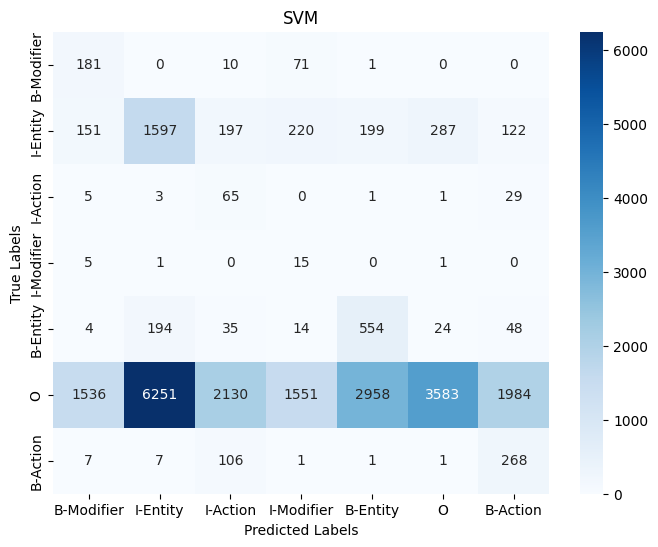

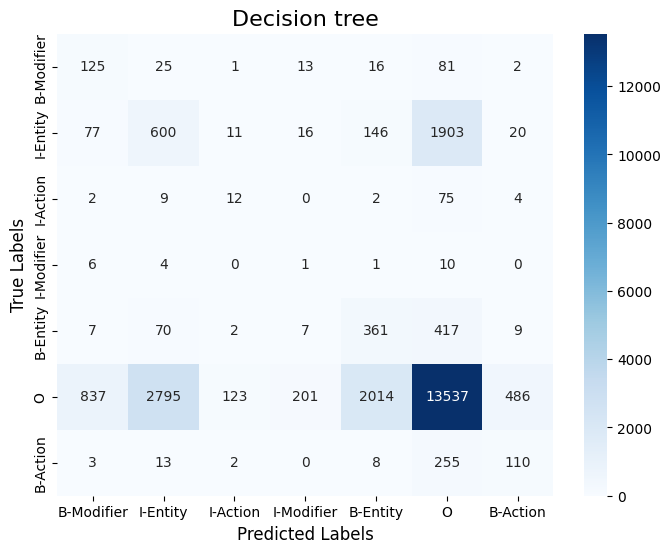

In [10]:
#print(y_pred)
label = {element: y_valid.count(element) for element in set(y_valid)} #taking the different labels
dict_label = {value: idx for idx, value in enumerate(label)} #putting indexes for every label
print(dict_label)

confusion_SVM = confusion_matrix(y_valid, y_pred, labels = list(dict_label.keys())) #confusion matrix for the SVM model (validation data)
confusion_tree = confusion_matrix(y_valid, y_pred_tree, labels = list(dict_label.keys())) #confusion matrix for the decision tree model (validation data)

#plottting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_SVM, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels = list(dict_label.keys()), yticklabels = list(dict_label.keys()))

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM")

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(confusion_tree, annot=True, fmt="d", cmap="Blues", cbar=1, xticklabels = list(dict_label.keys()), yticklabels = list(dict_label.keys()))

# Add labels, title, and adjust layout
plt.title("Decision tree", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.show()

In [11]:
#y_pred_aligned = (['O', 'B-Entity', 'I-Entity'] * (len(all_testing_tokens) // 3 + 1))[:len(all_testing_tokens)]
shape = word_number_sentence(testing_data, "tokens") #retrieve the size of every originbal sentences so we can align the labels with the tokens
print(shape)

dataframe = pd.DataFrame
List_decision, List_SVM = [], []
List_decision_tree, List_SVM_final = [], []
var = 0

# aligning predicted labels with the tokens
for i in shape:
    for j in range(i):
        List_decision.append(y_pred_tree_testing[var]) #adding predicted values for the size of the sentences
        List_SVM.append(y_pred_SVM_testing[var])
        var += 1
    List_decision_tree.append(List_decision)
    List_SVM_final.append(List_SVM)
    List_decision, List_SVM = [], []

print(List_decision_tree)
print(List_SVM_final)

[14, 29, 37, 43, 19, 27, 25, 20, 11, 23, 28, 14, 30, 14, 9, 14, 17, 12, 43, 25, 34, 16, 18, 13, 31, 27, 29, 14, 24, 23, 32, 15, 12, 42, 24, 24, 20, 16, 24, 38, 25, 18, 18, 14, 14, 35, 1, 22, 20, 28, 27, 35, 23, 23, 47, 19, 21, 10, 14, 18, 34, 32, 43, 14, 15, 13, 30, 32, 23, 20, 16, 3, 25, 8, 22, 24, 24, 37, 35, 29, 21, 19, 30, 33, 23, 24, 32, 18, 17, 22, 13, 16, 21, 19, 27, 14, 23, 13, 23, 40, 24, 16, 22, 28, 28, 15, 15, 31, 29, 57, 26, 30, 14, 13, 28, 24, 31, 31, 36, 27, 20, 24, 39, 9, 48, 34, 21, 18, 10, 25, 33, 9, 19, 30, 38, 15, 29, 35, 24, 16, 32, 20, 20, 19, 20, 8, 24, 17, 40, 14, 7, 26, 19, 21, 45, 122, 11, 38, 36, 13, 36, 12, 21, 25, 28, 18, 34, 37, 20, 31, 7, 12, 23, 45, 32, 48, 10, 27, 34, 20, 29, 15, 23, 21, 16, 30, 9, 26, 22, 19, 17, 12, 41, 23, 28, 31, 15, 36, 20, 29, 12, 10, 12, 12, 15, 33, 14, 34, 13, 23, 32, 17, 35, 12, 23, 24, 34, 30, 29, 8, 28, 18, 22, 11, 12, 28, 26, 37, 19, 44, 28, 25, 15, 131, 54, 63, 33, 17, 10, 11, 18, 20, 40, 22, 31, 25, 31, 24, 15, 23, 11, 26, 

In [12]:
#creating the final dataframe for the output file
data = pd.DataFrame({'ner_tags': List_decision_tree})
data2 = pd.DataFrame({'ner_tags': List_SVM_final})
#print(data.head())
#print(testing_data.head())
testing_data_decision = testing_data.copy()
testing_data_decision = testing_data_decision.drop(columns=['Details']) #removing the words characteristics 
testing_data_decision['ner_tags'] = data['ner_tags'] #adding predicted labels
testing_data_SVM = testing_data.drop(columns=['Details']) #removing the words characteristics 
testing_data_SVM['ner_tags'] = data2['ner_tags'] #adding predicted labels

In [13]:
#checking size problems between orignal data and labels predicted, and removing the problematic lines
a = 0
indices = []
for i in range(len(testing_data_decision)):
    if len(testing_data_decision.iloc[i]['ner_tags'])!=len(testing_data_decision.iloc[i]['tokens']): #if the size is different
        a = a+1
        indices.append(i) #adding index
print("nombre de lignes fausses : ",a)
print(indices)

testing_data_decision = testing_data_decision.drop(indices).reset_index(drop=True) #removing lines

#checking size problems between orignal data and labels predicted, and removing the problematic lines
a = 0
indices = []
for i in range(len(testing_data_SVM)):
    if len(testing_data_SVM.iloc[i]['ner_tags'])!=len(testing_data_SVM.iloc[i]['tokens']): #if the size is different
        a = a+1
        indices.append(i) #adding index
print("nombre de lignes fausses : ",a)
print(indices)
testing_data_SVM = testing_data_SVM.drop(indices).reset_index(drop=True) #removing lines


nombre de lignes fausses :  0
[]
nombre de lignes fausses :  0
[]


In [14]:
import os
os.getcwd()
os.chdir("C:/Users/Mustapha/OneDrive - IPSA/Aéro 5/Ma513 Hands-on Machine Learning for Cybersecurity/NER4Cyber-IPSA-main") # <---- Change the path

In [15]:
with open("output_decision_tree.jsonlines", "w") as f: #creating the file for decision tree
    for _, row in testing_data_decision.iterrows():
        # Convertir chaque ligne en JSON
        f.write(json.dumps(row.to_dict()) + "\n")

with open("output_SVM_poly_c1.jsonlines", "w") as f: #creating the file for SVM
    for _, row in testing_data_SVM.iterrows():
        # Convertir chaque ligne en JSON
        f.write(json.dumps(row.to_dict()) + "\n")

print("Fichiers créés.")

Fichiers créés.
